<a href="https://colab.research.google.com/github/R32132/retail-sales-advance-machine-learning-project/blob/main/Copy_of_RETAIL_ANALSIS_M_L_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT NAME =INTEGRATED RETAIL ANALYTICS MACHINE LEARNING PROJECT

NAME OF STUDENT = RAKESH KUMAR DHANORIYA                                    
STUDENT ID = 3576628753

GIT HUB LINK = ""

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path ="/content/drive/MyDrive/RETAIL ML ANALSIS PROJECT/retail_store_inventory.csv"

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path ="/content/drive/MyDrive/RETAIL ML ANALSIS PROJECT/retail_store_inventory.csv"
df = pd.read_csv(path)

df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [ ]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [ ]:
print(df.describe())

       Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count     73100.000000  73100.000000   73100.000000     73100.000000   
mean        274.469877    136.464870     110.004473       141.494720   
std         129.949514    108.919406      52.277448       109.254076   
min          50.000000      0.000000      20.000000        -9.990000   
25%         162.000000     49.000000      65.000000        53.670000   
50%         273.000000    107.000000     110.000000       113.015000   
75%         387.000000    203.000000     155.000000       208.052500   
max         500.000000    499.000000     200.000000       518.550000   

              Price      Discount  Holiday/Promotion  Competitor Pricing  
count  73100.000000  73100.000000       73100.000000        73100.000000  
mean      55.135108     10.009508           0.497305           55.146077  
std       26.021945      7.083746           0.499996           26.191408  
min       10.000000      0.000000           0.00000

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


In [ ]:
categorical_columns=df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nFrequency counts for {col}:")
    print(df[col].value_counts())
    print(f"Percentage distribution for {col}:")


Frequency counts for Date:
Date
2024-01-01    100
2022-01-01    100
2022-01-02    100
2022-01-03    100
2022-01-04    100
             ... 
2022-01-16    100
2022-01-15    100
2022-01-14    100
2022-01-13    100
2022-01-12    100
Name: count, Length: 731, dtype: int64
Percentage distribution for Date:

Frequency counts for Store ID:
Store ID
S001    14620
S002    14620
S003    14620
S004    14620
S005    14620
Name: count, dtype: int64
Percentage distribution for Store ID:

Frequency counts for Product ID:
Product ID
P0001    3655
P0002    3655
P0003    3655
P0004    3655
P0005    3655
P0006    3655
P0007    3655
P0008    3655
P0009    3655
P0010    3655
P0011    3655
P0012    3655
P0013    3655
P0014    3655
P0015    3655
P0016    3655
P0017    3655
P0018    3655
P0019    3655
P0020    3655
Name: count, dtype: int64
Percentage distribution for Product ID:

Frequency counts for Category:
Category
Furniture      14699
Toys           14643
Clothing       14626
Groceries      14611
Elect

In [ ]:
print("\nAdditional Statistics:")
print(f"Total number of stores: {df['Store ID'].nunique()}")
print(f"Total number of products: {df['Product ID'].nunique()}")
print(f"Date range: from {df['Date'].min()} to {df['Date'].max()}")


Additional Statistics:
Total number of stores: 5
Total number of products: 20
Date range: from 2022-01-01 to 2024-01-01


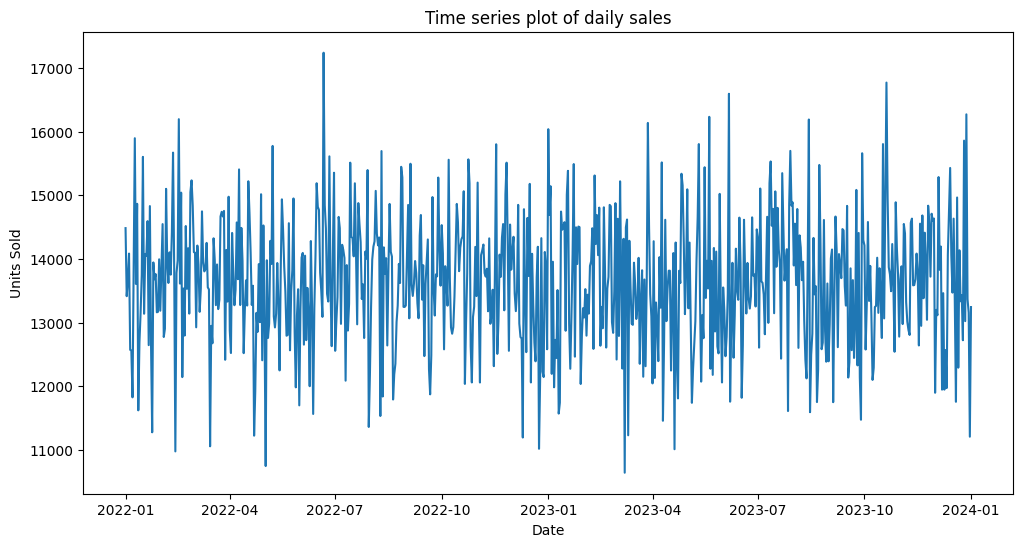

In [ ]:
df['Date']= pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['Units Sold'].sum().reset_index()

# Plot daily sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Units Sold'])
plt.title('Time series plot of daily sales')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

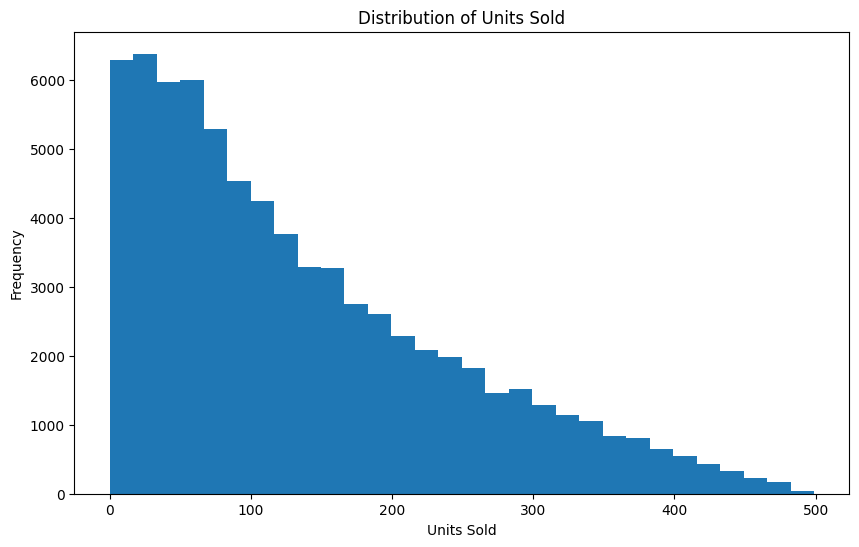

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Units Sold'], bins=30)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

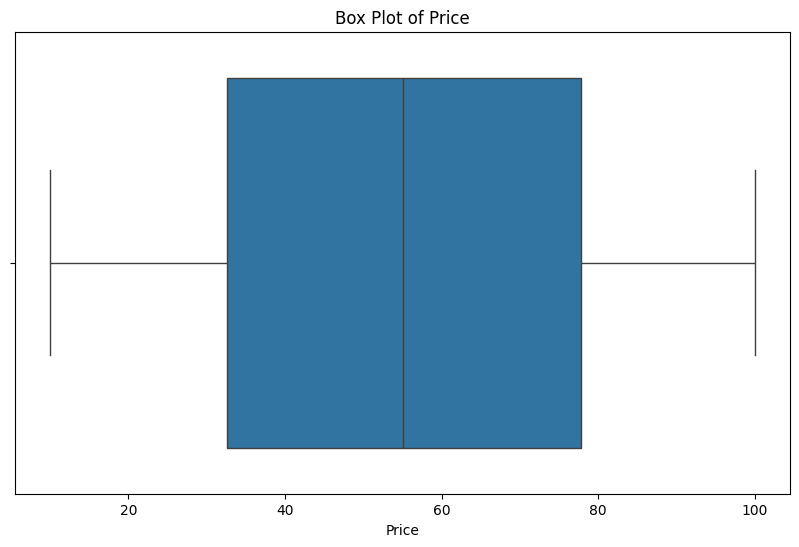

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Price')
plt.show()

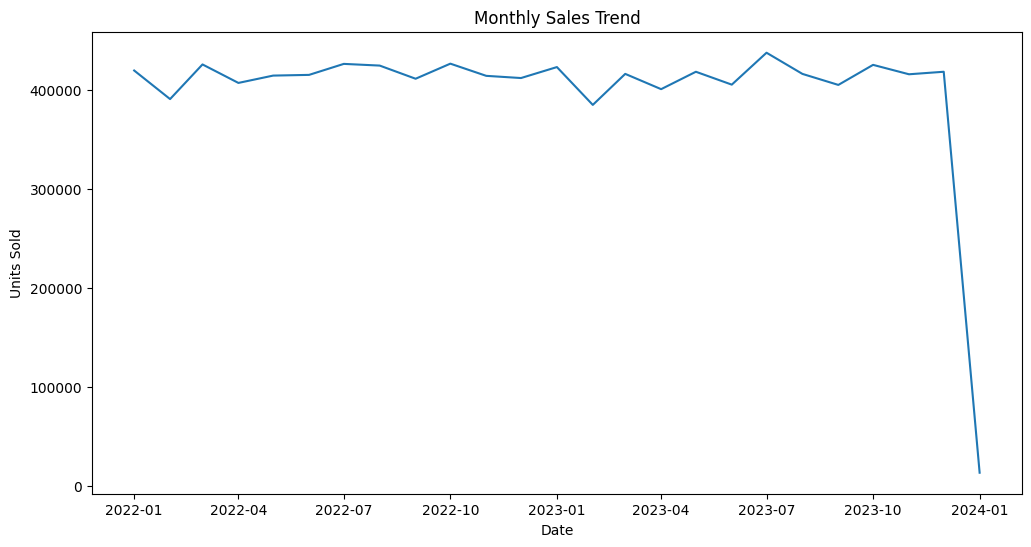

In [ ]:
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Units Sold'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Units Sold'])
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

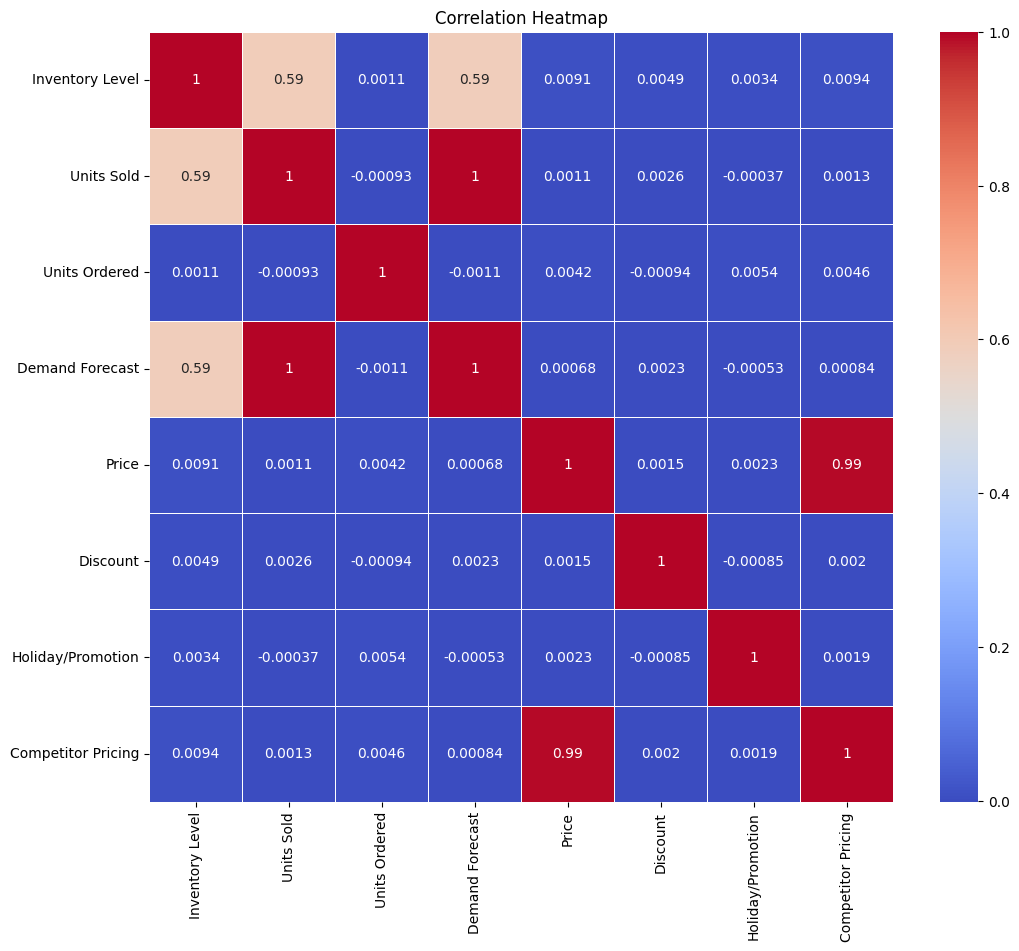

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Time Series Demand Forecasting

In [ ]:
df = df.sort_values('Date')
daily_sales = df.groupby('Date')['Units Sold'].sum().reset_index()
daily_sales.set_index('Date', inplace=True)

In [ ]:
daily_sales['DayOfWeek'] = daily_sales.index.dayofweek
daily_sales['Month'] = daily_sales.index.month

In [ ]:
scaler = MinMaxScaler()
sales_scaled = scaler.fit_transform(daily_sales)

In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :])
        y.append(data[i + seq_length, 0])  # Target is 'Units Sold'
    return np.array(X), np.array(y)

seq_length = 60  # Increased sequence length for better context
X, y = create_sequences(sales_scaled, seq_length)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(seq_length, X.shape[2])),
    Dropout(0.2),
    LSTM(100, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)  # Output layer for predicting Units Sold
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)
# Make predictions on the test set
lstm_predictions = model.predict(X_test)

# Inverse transform the predictions and actual values correctly
# We need to create a full feature set for inverse transformation.
lstm_predictions_full = np.column_stack((lstm_predictions, np.zeros((lstm_predictions.shape[0], X.shape[2] - 1))))
y_test_full = np.column_stack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X.shape[2] - 1))))

lstm_predictions_inverse = scaler.inverse_transform(lstm_predictions_full)[:, 0]
y_test_actual_inverse = scaler.inverse_transform(y_test_full)[:, 0]

# Calculate RMSE and MAE for LSTM predictions
lstm_rmse = np.sqrt(mean_squared_error(y_test_actual_inverse, lstm_predictions_inverse))
lstm_mae = mean_absolute_error(y_test_actual_inverse, lstm_predictions_inverse)

print("LSTM RMSE:", lstm_rmse)
print("LSTM MAE:", lstm_mae)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 410ms/step - loss: 0.1560 - val_loss: 0.0221
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0310 - val_loss: 0.0220
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0307 - val_loss: 0.0218
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0279 - val_loss: 0.0260
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0261 - val_loss: 0.0236
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0288 - val_loss: 0.0219
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0274 - val_loss: 0.0222
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0291 - val_loss: 0.0236
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0275 - val_loss: 0.0221
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0327 - val_loss: 0.0280
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0295 - val_loss: 0.0232
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/st

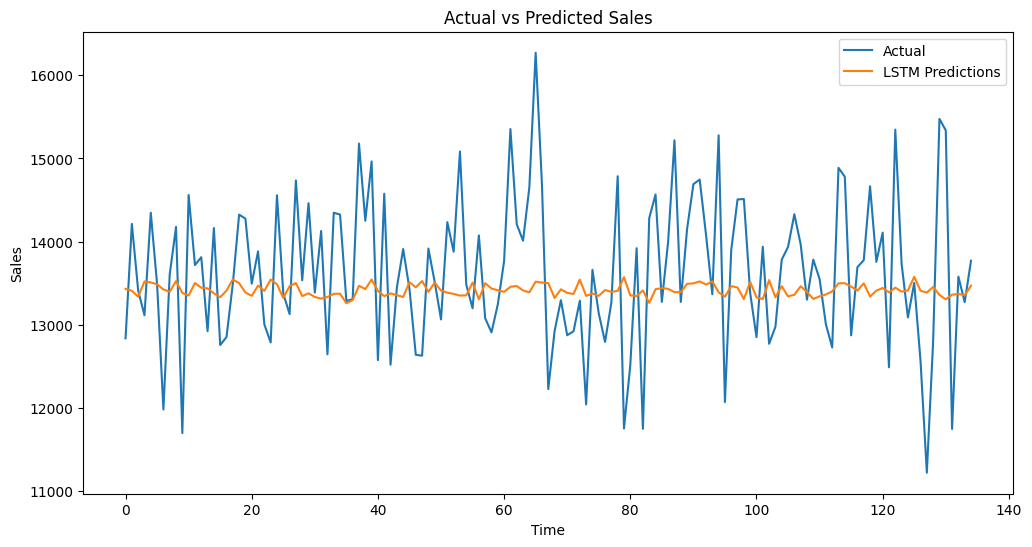

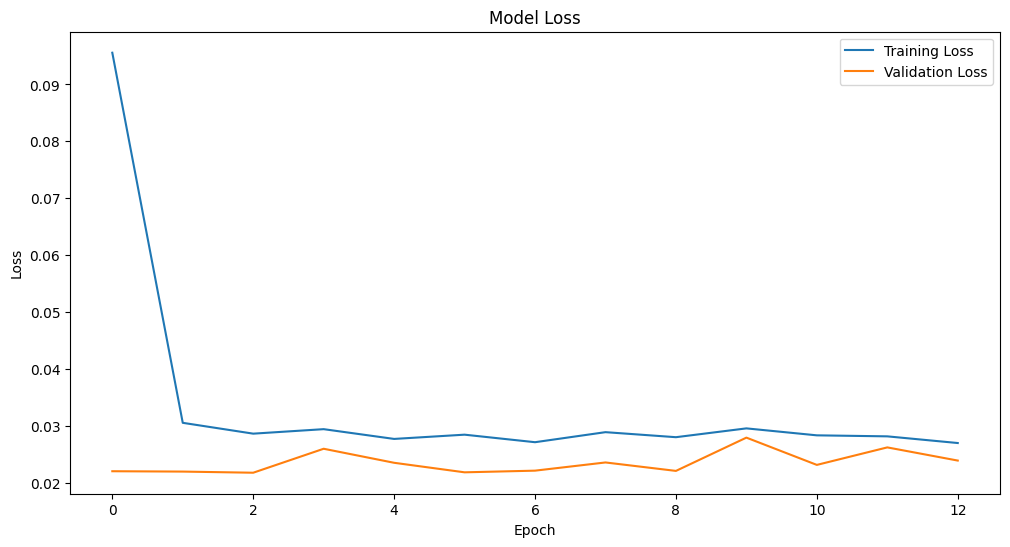

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual_inverse, label='Actual')
plt.plot(lstm_predictions_inverse, label='LSTM Predictions')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot the training history to visualize loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

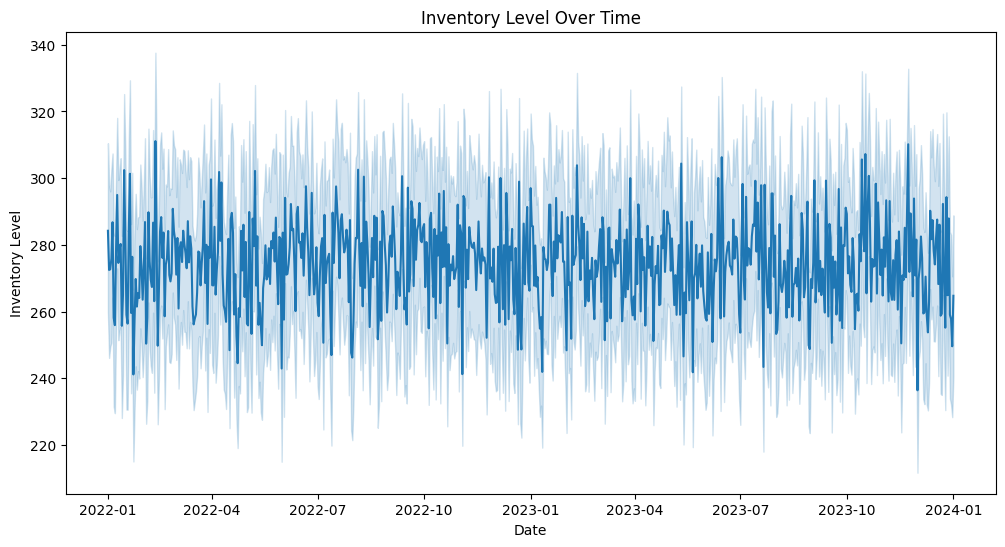

In [ ]:
#Challenge 2: Inventory Optimization¶


#To get result of demand forcasting challenge, start feature enginnering then model with random forest and XGBoost Separately and finally with Ensemble prediction methods I got better result that would be improve

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Inventory Level', data=df)
plt.title('Inventory Level Over Time')
plt.show()

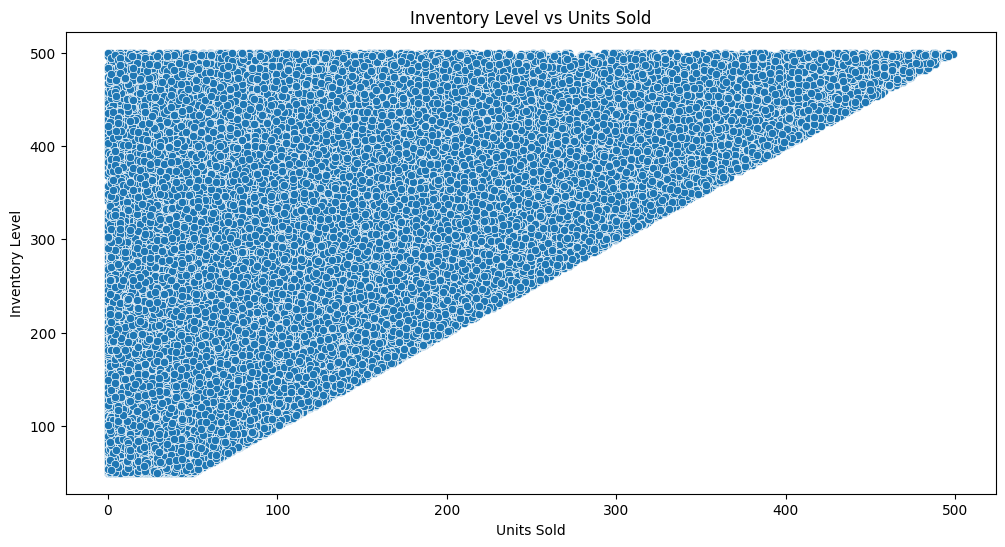

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Units Sold', y='Inventory Level', data=df)
plt.title('Inventory Level vs Units Sold')
plt.show()

In [ ]:
# Calculate stockout frequency
stockout_freq = (df['Inventory Level'] == 0).mean()
print(f"Stockout frequency: {stockout_freq:.2%}")

Stockout frequency: 0.00%


In [ ]:
# Calculate overstock frequency
avg_daily_sales = df.groupby('Date')['Units Sold'].mean().mean()
overstock_freq = (df['Inventory Level'] > 2 * avg_daily_sales).mean()
print(f"Overstock frequency: {overstock_freq:.2%}")

Overstock frequency: 50.19%


In [ ]:
# Sort the DataFrame by date and store/product ID to ensure correct lag and rolling calculations
df = df.sort_values(['Store ID', 'Product ID', 'Date'])

# Create lag features
for lag in [1, 7]:
    df[f'Sales_Lag_{lag}'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'].shift(lag)

# Create rolling mean features
for window in [7, 14]:
    df[f'Sales_RollingMean_{window}'] = df.groupby(['Store ID', 'Product ID'])['Units Sold'].transform(lambda x: x.rolling(window=window, min_periods=1).mean())

# Add day of week and month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

# Handle missing values
df = df.dropna()
# Print the shape of the DataFrame before and after dropping NA values
print(f"Shape before dropping NA: {df.shape}")
print(f"Shape after dropping NA: {df.shape}")

# Check the created features
print(df[['Units Sold'] + [f'Sales_Lag_{lag}' for lag in [1, 7]] + [f'Sales_RollingMean_{window}' for window in [7, 14]] + ['DayOfWeek', 'Month']].head())

Shape before dropping NA: (72400, 21)
Shape after dropping NA: (72400, 21)
      Units Sold  Sales_Lag_1  Sales_Lag_7  Sales_RollingMean_7  \
700            2        107.0        127.0            62.428571   
800          350          2.0         81.0           100.857143   
900           36        350.0          5.0           105.285714   
1000          16         36.0         58.0            99.285714   
1100         104         16.0        147.0            93.142857   

      Sales_RollingMean_14  DayOfWeek  Month  
700              70.500000          5      1  
800             101.555556          6      1  
900              95.000000          0      1  
1000             87.818182          1      1  
1100             89.166667          2      1  


In [ ]:
features = ['Sales_Lag_1', 'Sales_Lag_7', 'Sales_RollingMean_7', 'DayOfWeek', 'Month', 'Price', 'Discount']
X = df[features]
y = df['Units Sold']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 10507.79


Mean Absolute Error: 82.69
R-squared Score: 0.12


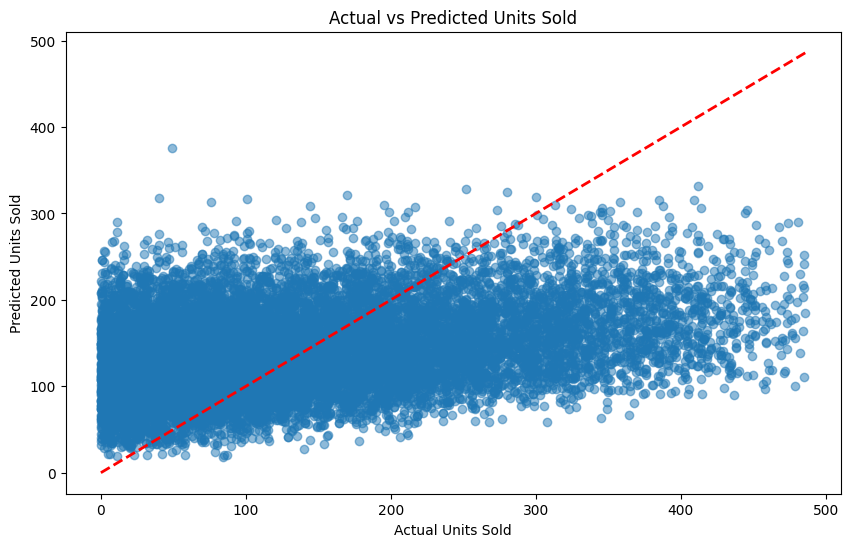

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted Units Sold")
plt.show()

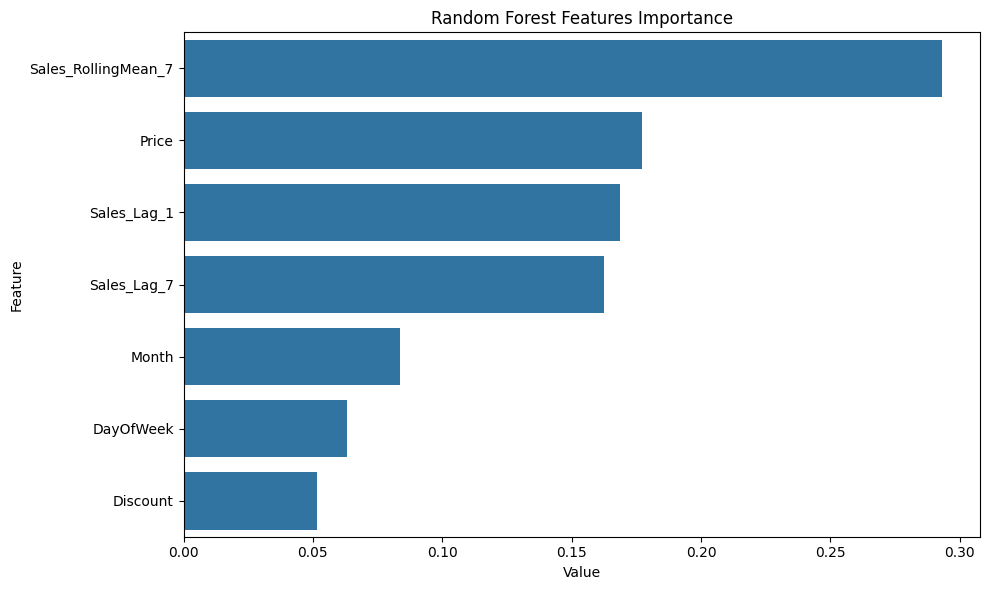

In [ ]:
# Feature importance
importances = rf_model.feature_importances_
feature_imp = pd.DataFrame(sorted(zip(importances, features)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Random Forest Features Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Prepare features and target
features = ['Sales_Lag_1', 'Sales_Lag_7', 'Sales_RollingMean_7', 'DayOfWeek', 'Month', 'Price', 'Discount']
X = df[features]
y = df['Units Sold']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train xgb boost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_xgb):.2f}")


XGBoost Results:
MSE: 10373.03
R-squared: 0.14


In [ ]:
# Prepare the data again
X = df[features]
y = df['Units Sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and fit the ensemble
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(random_state=42)
lr_model = LinearRegression()

In [ ]:
ensemble = VotingRegressor(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lr', lr_model)],
    weights=[2, 2, 1]
)

In [ ]:
ensemble.fit(X_train, y_train)

# Make predictions
y_pred_ensemble = ensemble.predict(X_test)

In [ ]:
# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print("Ensemble Model Results (original features):")
print(f"MSE: {mse_ensemble:.2f}")
print(f"R-squared: {r2_ensemble:.2f}")

Ensemble Model Results (original features):
MSE: 10154.28
R-squared: 0.15


 Dynamic Pricing

In [ ]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Sales_Lag_1', 'Sales_Lag_7',
       'Sales_RollingMean_7', 'Sales_RollingMean_14', 'DayOfWeek', 'Month'],
      dtype='object')

In [ ]:
# Encode categorical variables
le = LabelEncoder()
categorical_features = ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Holiday/Promotion','Seasonality']
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

In [ ]:
# Define features for the pricing model
pricing_features = ['Store ID', 'Product ID', 'Category', 'Region', 'Inventory Level',
                    'Demand Forecast', 'Competitor Pricing', 'Seasonality',
                    'Sales_Lag_1', 'Sales_Lag_7', 'Sales_RollingMean_7',
                    'Sales_RollingMean_14', 'DayOfWeek', 'Month'
                    , 'Weather Condition', 'Holiday/Promotion']

In [ ]:
X = df[pricing_features]
y = df['Price']

In [ ]:
X.head()

,Store ID,Product ID,Category,Region,Inventory Level,Demand Forecast,Competitor Pricing,Seasonality,Sales_Lag_1,Sales_Lag_7,Sales_RollingMean_7,Sales_RollingMean_14,DayOfWeek,Month,Weather Condition,Holiday/Promotion
700,0,0,2,0,231,0.84,63.82,3,107.0,127.0,62.428571,70.500000,5,1,0,1
800,0,0,1,2,373,352.24,38.68,2,2.0,81.0,100.857143,101.555556,6,1,3,1
900,0,0,1,3,327,39.50,34.71,2,350.0,5.0,105.285714,95.000000,0,1,2,1
1000,0,0,2,3,101,16.11,27.08,0,36.0,58.0,99.285714,87.818182,1,1,1,1
1100,0,0,4,2,145,100.32,97.59,3,16.0,147.0,93.142857,89.166667,2,1,2,0


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the XGBoost model
modelxgb =XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
modelxgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = modelxgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 8.01
R-squared Score: 0.99
